In [61]:
from __future__ import print_function
%matplotlib nbagg

import datetime as dt
import os
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.dates import num2date, DateFormatter
from scipy.io import readsav
from sunpy.lightcurve import GOESLightCurve, LightCurve
from sunpy.time import TimeRange
from noaareport import NoaaReport

from utils import (
    onclick, posicao, calculo_de_indice, load_dados,
    calculo_da_media, CAMINHO_ABSOLUTO, ponto_mais_proximo
)

In [88]:
dia = "13"
mes = "01"
ano = "2005"
df, time, diretorio = load_dados(dia, mes, ano)

O diretorio já existe


<IPython.core.display.Javascript object>


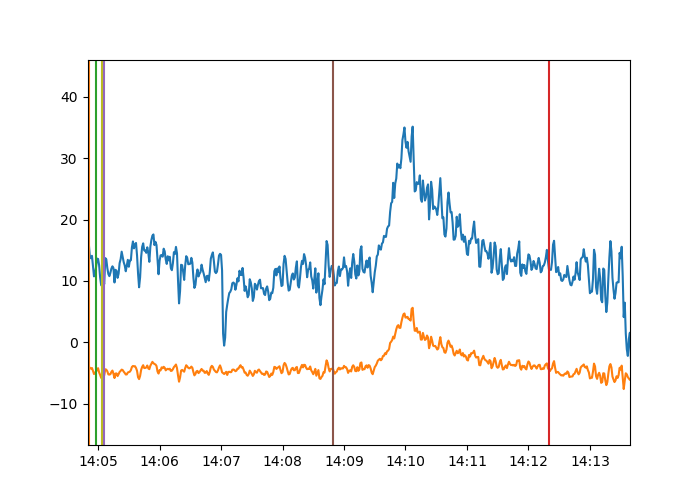

6

In [90]:
plt.rcParams['figure.figsize'] = 7,5
fig, axis = plt.subplots()

# Usa o index do dataframe para o eixo x.
axis.plot(df)
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.canvas.mpl_connect('button_press_event', onclick)

In [92]:
"""
 Ordem de seleção:
  Os dois últimos (últimos) selecionados são usados para o calculo das médias.
  Os dois penúltimos (primeiros) selecionados são usados para representar a média
  no grafico.
"""
dados_da_media = calculo_da_media(df)

indice_ig1 = dados_da_media[0]
indice_ig2 = dados_da_media[1]
medias = dados_da_media[2]
media_final_r = medias['R']
media_final_l = medias['L']
tempo1_flare = dados_da_media[3]
tempo2_flare = dados_da_media[4]

<IPython.core.display.Javascript object>


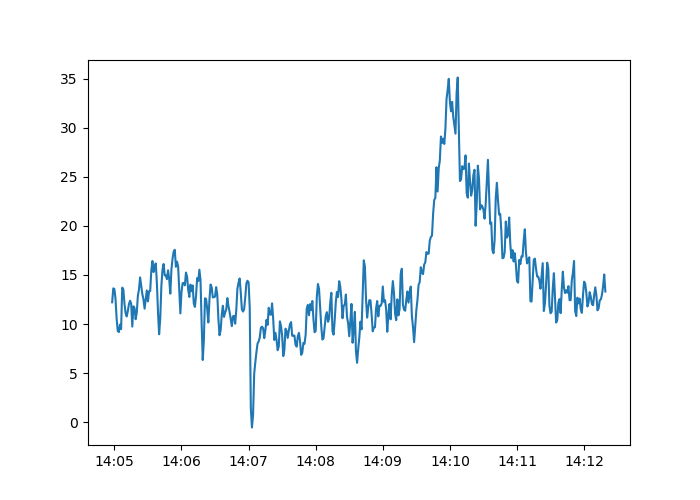

<IPython.core.display.Javascript object>


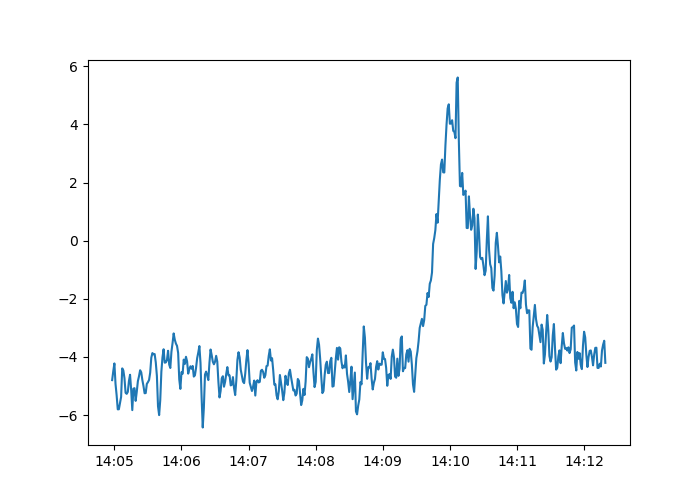

In [93]:
fig_R, axis = plt.subplots()
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df["R"][tempo1_flare:tempo2_flare])
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

#plt.plot([df.index[tempo1_flare], df.index[tempo2_flare]],[media_final_r, media_final_r])

fig_L, axis = plt.subplots()
# Usa o mesmo index do dataframe para o eixo x.
axis.plot(df["L"][tempo1_flare:tempo2_flare])
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

#plt.plot([df.index[tempo1_flare], df.index[tempo2_flare]],[media_final_l, media_final_l])

<IPython.core.display.Javascript object>


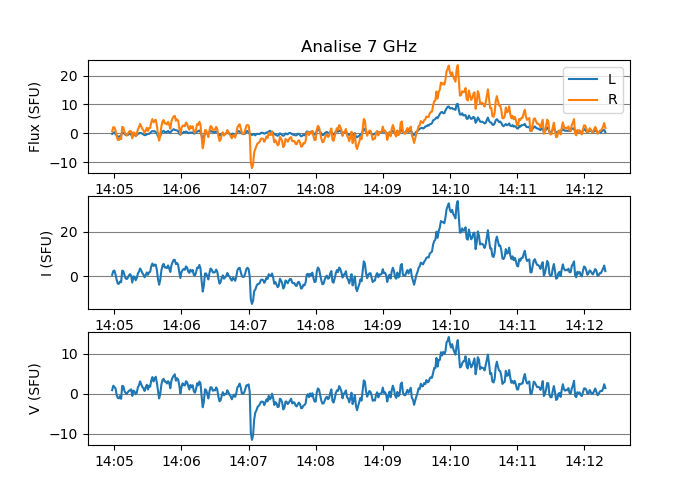

In [94]:
LM_normalizado = df["L_normalizado"][tempo1_flare:tempo2_flare]
RM_normalizado = df["R_normalizado"][tempo1_flare:tempo2_flare]

RL_V = df["R_normalizado"][tempo1_flare:tempo2_flare] - df["L_normalizado"][tempo1_flare:tempo2_flare]
RL_I = df["L_normalizado"][tempo1_flare:tempo2_flare] + df["R_normalizado"][tempo1_flare:tempo2_flare]

fig_IV, (axis, ax, ax2) = plt.subplots(3)

# Usa o mesmo index do dataframe para o eixo x.
axis.plot(LM_normalizado, label="L")
axis.plot(RM_normalizado, label="R")
axis.set_title("Analise 7 GHz")
axis.legend()
axis.set_ylabel("Flux (SFU)")
axis.yaxis.grid(color='gray')

ax.plot(RL_I)
ax.set_ylabel("I (SFU)")
ax.yaxis.grid(color='gray')

ax2.plot(RL_V)
ax2.set_ylabel("V (SFU)")
ax2.yaxis.grid(color='gray')

axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax2.xaxis.set_major_formatter(DateFormatter('%H:%M'))
pico_7ghz = max(RL_I)

# Salva o gráfico.
nome_do_arquivo = "I-V-Flux(SFU)"
if platform.system() == "Linux":
    fig.savefig(CAMINHO_ABSOLUTO + diretorio + "/" + nome_do_arquivo)
else:
    fig.savefig(CAMINHO_ABSOLUTO + diretorio + "\\" + nome_do_arquivo)

## Região Ativa

In [91]:
comeco_flare = comeco_flare.replace('/', '-')
fim_flare = fim_flare.replace('/', '-')

caminho_eventos = "Eventos/" + ano + "_events/"
report = NoaaReport(ano, mes, dia, caminho_eventos)
noaa_df = report.get_dataframe()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(noaa_df)
ars = report.get_active_region(comeco_flare, fim_flare)

      event  begin    max   end  obs  Q type loc/freq      particulars   reg
0      2070   0000   ////  0000  CUL  C  RSP   20-180            CTM/1      
1      1510   0049   ////  0049  LEA  C  RSP  025-077            III/1      
2    1520 +   0052   0102  0114  G12  5  XRA     1-8A  C1.0    1.1E-03  0718
3    1520 +   0053   ////  0057  CUL  C  RSP   18-200            III/2  0718
4      1520   0055   0107  0113  G12  5  XFL   S06E26  1.5E+03 4.5E+03  0718
5    1520 +   0058   0058  0108  LEA  3  FLA   S10E17      SF      ERU  0718
6    1530 +   0131   0134  0139  G12  5  XRA     1-8A  B4.6    2.0E-04  0720
7      1530   0135   0137  0137  G12  5  XFL   N13E37  5.0E+01 8.3E+01  0720
8      1530   0139   ////  0142  LEA  C  RSP  025-180            III/1  0720
9      1540   0332   0332  0332  LEA  G  RBR      245              150      
10     1550   0340   0340  0340  LEA  G  RBR      245              100      
11   1570 +   0347   ////  0348  CUL  C  RSP   18-160            III/2      

In [25]:
ar = "None"
ar_noaa = "0715"

## Grau de polarização

<IPython.core.display.Javascript object>


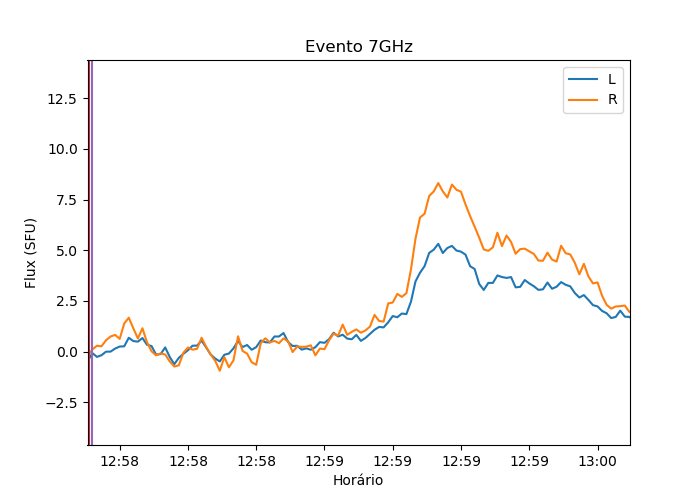

In [20]:
fig_7ghz, axis = plt.subplots()

# Usa o mesmo index do dataframe para o eixo x.
axis.plot(LM_normalizado, label="L")
axis.plot(RM_normalizado, label="R")
axis.xaxis.set_major_formatter(DateFormatter('%H:%M'))

axis.legend()
axis.set_ylabel("Flux (SFU)")
axis.set_xlabel("Horário")
plt.title("Evento 7GHz")

fig_7ghz.canvas.mpl_connect('button_press_event', onclick)

filename = "grafico_normalizado"
if platform.system() == "Linux":
    fig_7ghz.savefig(CAMINHO_ABSOLUTO + diretorio + "/" + filename)
else:
    fig_7ghz.savefig(CAMINHO_ABSOLUTO + diretorio + "\\" + filename)

In [21]:
posicao_inicial= num2date(posicao[-1][0])
indice_de_y1 = calculo_de_indice(df, posicao_inicial)

pico_R = max(df["R_normalizado"][tempo1_flare:tempo2_flare])
pico_L = max(df["L_normalizado"][tempo1_flare:tempo2_flare])

ponto_do_r_inicial = indice_de_y1[0][2]
ponto_do_r_inicial = float("{:.3f}".format(ponto_do_r_inicial))
print('Ponto do R inicial:', ponto_do_r_inicial)

ponto_do_r_no_pico = float(str(pico_R)[0:7])
ponto_do_r_no_pico = float("{:.3f}".format(ponto_do_r_no_pico))
print('Ponto do R no pico:', ponto_do_r_no_pico)

ponto_do_l_inicial = indice_de_y1[0][3]
ponto_do_l_inicial = float("{:.3f}".format(ponto_do_l_inicial))
print('Ponto do L incial:', ponto_do_l_inicial)

ponto_do_l_no_pico = float(str(pico_L)[0:7])
ponto_do_l_no_pico = float("{:.3f}".format(ponto_do_l_no_pico))
print('Ponto do L no pico:', ponto_do_l_no_pico)

# Procura o horario do pico.
for data in enumerate(df["R_normalizado"]):
    # Se encontrar o valor do pico, cria a variavel horario_do_pico.
    if data[1] == pico_R:
        horario_do_pico = df["R_normalizado"].index[data[0]]

tempo = str(horario_do_pico)[0:26]
print('Tempo:', tempo)

Ponto do R inicial: 0.109
Ponto do R no pico: 8.317
Ponto do L incial: -0.072
Ponto do L no pico: 5.319
Tempo: 2005-01-02 17:58:04.998900


In [22]:
I = ((ponto_do_r_no_pico - ponto_do_r_inicial) + (ponto_do_l_no_pico - ponto_do_l_inicial))
I = float("{:.3f}".format(I))
print("Cálculo do I:", I)

V = ((ponto_do_r_no_pico - ponto_do_r_inicial) - (ponto_do_l_no_pico - ponto_do_l_inicial))
V = float("{:.3f}".format(V))
print("Cálculo do V:", V)

Cálculo do I: 13.599
Cálculo do V: 2.817


In [23]:
# Grau de polarização.
GP = (V / I) * 100
GP = float("{:.3f}".format(GP))
print('Grau de Polarização:', GP)

Grau de Polarização: 20.715


In [52]:
horario_pico = str(horario_do_pico)[:19]

In [60]:
resultados_finais = np.transpose([
    [comeco_flare],
    [horario_pico],
    [fim_flare],
    [GP], [I], [V],
    [ar], [ar_noaa]
])
columns = ['begin','max','end', 'GP','I','V', 'AR', 'AR_NOAA']
dados = pd.DataFrame(resultados_finais, columns=columns)

if platform.system() == "Linux":
    dados.to_csv(CAMINHO_ABSOLUTO + "/eventos_wavelet/eventos.csv", header=None, sep=' ', mode='a', index=False)
else:
    dados.to_csv(CAMINHO_ABSOLUTO + "\eventos_wavelet\eventos.csv", header=None, sep=' ', mode='a', index=False)